In [338]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [340]:
df=pd.read_csv("Loan Eligibility Prediction.csv")

In [342]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [344]:
df.isnull().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [277]:
df["Loan_Status"] = df["Loan_Status"].map({"Y":1,"N":0})

In [348]:
for col in df.columns:
    print(df[col].value_counts())


Customer_ID
569    1
608    1
263    1
320    1
372    1
      ..
498    1
24     1
53     1
167    1
606    1
Name: count, Length: 614, dtype: int64
Gender
Male      499
Female    115
Name: count, dtype: int64
Married
Yes    399
No     215
Name: count, dtype: int64
Dependents
0    351
2    110
1    102
4     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     523
Yes     91
Name: count, dtype: int64
Applicant_Income
2500    9
6000    6
2600    6
4583    6
5000    5
       ..
4124    1
2750    1
6045    1
4188    1
2492    1
Name: count, Length: 505, dtype: int64
Coapplicant_Income
0.0       273
2083.0      5
2500.0      5
1666.0      5
1625.0      3
         ... 
1280.0      1
4300.0      1
2253.0      1
2034.0      1
3800.0      1
Name: count, Length: 287, dtype: int64
Loan_Amount
120    20
110    17
100    15
160    12
187    12
       ..
58      1
59      1
196     1
61      1
10      1
Name: count, Length: 2

In [350]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [279]:
df.drop("Customer_ID",axis= 1, inplace=True)

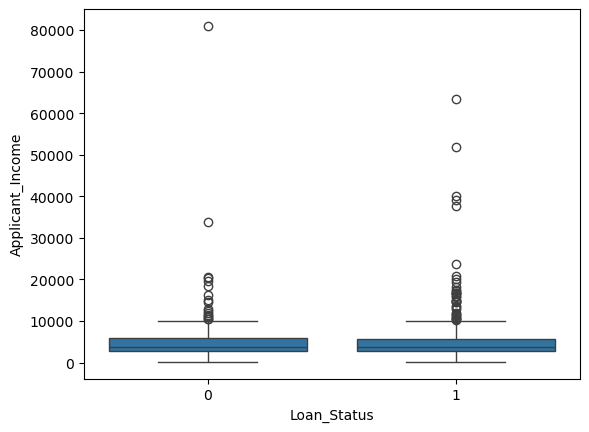

In [281]:
sns.boxplot(x="Loan_Status", y="Applicant_Income", data=df)
plt.show()

In [283]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [287]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [289]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,0
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,1
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,1
3,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,1
4,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,1


In [291]:
binary_map = {
    "Gender": {"Male":1, "Female":0},
    "Married": {"Yes":1, "No":0},
    "Education": {"Graduate":1, "Not Graduate":0},
    "Self_Employed": {"Yes":1, "No":0}
}
for col in binary_map:
    X_train[col] = X_train[col].map(binary_map[col])
    X_test[col]  = X_test[col].map(binary_map[col])



In [293]:
X_train["Dependents"] = X_train["Dependents"].replace("3+",3).astype(int)
X_test["Dependents"]  = X_test["Dependents"].replace("3+",3).astype(int)

In [295]:
one_hot_columns=["Property_Area"]
transformer= ColumnTransformer(transformers=[
    (
        "onehot",OneHotEncoder(drop="first",handle_unknown="ignore"),one_hot_columns
    )
],remainder="passthrough")

In [297]:
X_train=transformer.fit_transform(X_train)
X_test=transformer.transform(X_test)

In [299]:
encoded_cols= transformer.get_feature_names_out()

In [301]:
X_train = pd.DataFrame(X_train, columns=encoded_cols, index=y_train.index)
X_test = pd.DataFrame(X_test, columns=encoded_cols, index=y_test.index)

In [303]:
X_train.head()

,onehot__Property_Area_Semiurban,onehot__Property_Area_Urban,remainder__Gender,remainder__Married,remainder__Dependents,remainder__Education,remainder__Self_Employed,remainder__Applicant_Income,remainder__Coapplicant_Income,remainder__Loan_Amount,remainder__Loan_Amount_Term,remainder__Credit_History
149,1.0,0.0,1.0,1.0,4.0,1.0,0.0,4691.0,0.0,100.0,360.0,1.0
234,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2167.0,2400.0,115.0,360.0,1.0
468,0.0,1.0,1.0,1.0,1.0,1.0,0.0,6400.0,7250.0,180.0,360.0,0.0
502,0.0,1.0,1.0,0.0,0.0,1.0,1.0,16250.0,0.0,192.0,360.0,0.0
264,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2583.0,2115.0,120.0,360.0,1.0


In [305]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 149 to 346
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   onehot__Property_Area_Semiurban  491 non-null    float64
 1   onehot__Property_Area_Urban      491 non-null    float64
 2   remainder__Gender                491 non-null    float64
 3   remainder__Married               491 non-null    float64
 4   remainder__Dependents            491 non-null    float64
 5   remainder__Education             491 non-null    float64
 6   remainder__Self_Employed         491 non-null    float64
 7   remainder__Applicant_Income      491 non-null    float64
 8   remainder__Coapplicant_Income    491 non-null    float64
 9   remainder__Loan_Amount           491 non-null    float64
 10  remainder__Loan_Amount_Term      491 non-null    float64
 11  remainder__Credit_History        491 non-null    float64
dtypes: float64(12)
memory usa

In [307]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 491 entries, 149 to 346
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
491 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


In [309]:
from xgboost import XGBClassifier

In [311]:
xgb=XGBClassifier()

In [313]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [315]:
y_pred=xgb.predict(X_test)

In [317]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [319]:
print("confusion_matrix :\n",confusion_matrix(y_test,y_pred))
print("accuracy_score :",accuracy_score(y_test,y_pred))
print("classification_report :",classification_report(y_test,y_pred))

confusion_matrix :
 [[22 16]
 [15 70]]
accuracy_score : 0.7479674796747967
classification_report :               precision    recall  f1-score   support

           0       0.59      0.58      0.59        38
           1       0.81      0.82      0.82        85

    accuracy                           0.75       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.75      0.75      0.75       123



In [321]:
params = {
    "n_estimators": [100,200,300,500],
    "learning_rate": [0.01,0.1],
    "max_depth": [5,8,12,20,30],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.8, 1]
}

In [323]:
from sklearn.model_selection import GridSearchCV

In [325]:
grid=GridSearchCV(estimator=XGBClassifier(),param_grid=params,cv=5,n_jobs=-1,)

In [327]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.8, 1],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 8, 12, 20, 30],
                         'n_estimators': [100, 200, 300, 500]})

In [329]:
grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300}

In [331]:
y_pred=grid.predict(X_test)

In [333]:
print("confusion_matrix :\n",confusion_matrix(y_test,y_pred))
print("accuracy_score :",accuracy_score(y_test,y_pred))
print("classification_report :",classification_report(y_test,y_pred))

confusion_matrix :
 [[18 20]
 [ 5 80]]
accuracy_score : 0.7967479674796748
classification_report :               precision    recall  f1-score   support

           0       0.78      0.47      0.59        38
           1       0.80      0.94      0.86        85

    accuracy                           0.80       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123

